## Time Series Prediction with Multilayer Perceptrons

Normalmente, es una buena idea investigar varias técnicas de preparación de datos para **reescalar los datos** y **hacerlos estacionarios**

This is a problem where given a year and a month, the task is to predict the number of
international airline passengers in **units of 1,000**. The data ranges from January 1949 to December
1960 or 12 years, with 144 observations

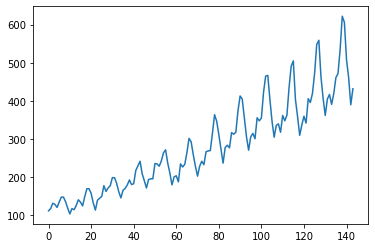

In [1]:
import pandas
import matplotlib.pyplot as plt

dataframe = pandas.read_csv("datos/datoscap24.csv",sep=";",header=0,usecols=[1])
plt.plot(dataframe)
plt.show()

## Multilayer Perceptron Regression

Como primera aproximación al problema intentaremos predecir la cantidad de vuelos con **MPR** y luego con **LSTM**.

Podemos escribir una función sencilla para convertir nuestra única columna de datos en un conjunto de datos de dos columnas. La primera columna contiene el recuento de pasajeros de este mes (t) y la segunda columna contiene el recuento de pasajeros del próximo mes (t+1), que debe predecirse.

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [3]:
dataset = dataframe.values
dataset = dataset.astype("float32")

Hay que tener cuidado en estos casos al momento de separar la data ya que el orden es importante, no podemos hacer un cross-validation como en los problemas de clasificación o regresión.

Intentaremos predecir el ultimo $33\%$ de los datos esto quiere decir los ultimos 48 meses. 

In [4]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

¿por qué se hace esta tranformacion extraña? simplemente porque nuestro objetivo es sabiendo el valor $t$ queremos predecir el valor $t+1$ entonces si $x=t$ entonces $y=t+1$ 

In [6]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu" ))
model.add(Dense(1))
model.compile(loss = "mean_squared_error" , optimizer = "adam" )
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 45063.9345
Epoch 2/200
 - 0s - loss: 36216.8404
Epoch 3/200
 - 0s - loss: 29902.6994
Epoch 4/200
 - 0s - loss: 24710.3009
Epoch 5/200
 - 0s - loss: 20399.9958
Epoch 6/200
 - 0s - loss: 16759.2809
Epoch 7/200
 - 0s - loss: 13726.3889
Epoch 8/200
 - 0s - loss: 11145.8729
Epoch 9/200
 - 0s - loss: 9003.8401
Epoch 10/200
 - 0s - loss: 7232.4500
Epoch 11/200
 - 0s - loss: 5788.0234
Epoch 12/200
 - 0s - loss: 4617.8471
Epoch 13/200
 - 0s - loss: 3651.3223
Epoch 14/200
 - 0s - loss: 2896.3609
Epoch 15/200
 - 0s - loss: 2287.5361
Epoch 16/200
 - 0s - loss: 1832.9882
Epoch 17/200
 - 0s - loss: 1471.1561
Epoch 18/200
 - 0s - loss: 1212.2056
Epoch 19/200
 - 0s - loss: 1013.4692
Epoch 20/200
 - 0s - loss: 870.0963
Epoch 21/200
 - 0s - loss: 765.4130
Epoch 22/200
 - 0s - loss: 691.5378
Epoch 23/200
 - 0s - loss: 641.2801
Epoch 24/200
 - 0s - loss: 605.3637
Epoch 25/200
 - 0s - loss: 580.8306
Epoch 26/200
 - 0s - loss: 565.6778
Epoch 27/200
 - 0s - loss: 554.7792
Epoch 28/2

In [8]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( "Train Score: %.2f MSE (%.2f RMSE)" % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( "Test Score: %.2f MSE (%.2f RMSE)" % (testScore, math.sqrt(testScore)))

Train Score: 533.05 MSE (23.09 RMSE)
Test Score: 2357.82 MSE (48.56 RMSE)


In [9]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [10]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [12]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

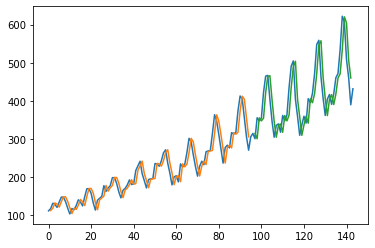

In [13]:
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()